In [1]:
pip install mlbgame

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load libraries
import mlbgame #import MLB API used for passing scores for prediction
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# load dataset
data = pd.read_csv("data.csv")
print(data)

                  away_team             home_team  Delta (ERA)  Delta (RBI)   \
0             New York Mets    Kansas City Royals         0.64            -9   
1     Philadelphia Phillies       Cincinnati Reds         0.28           104   
2           Minnesota Twins     Baltimore Orioles        -0.86            20   
3      Washington Nationals        Atlanta Braves         1.00          -120   
4          Colorado Rockies  Arizona Diamondbacks         0.18           -96   
...                     ...                   ...          ...           ...   
2458      Toronto Blue Jays        Tampa Bay Rays         0.42           -81   
2459    St. Louis Cardinals    Pittsburgh Pirates         0.13           -49   
2460   San Francisco Giants     Milwaukee Brewers         0.43           -34   
2461         Detroit Tigers         Miami Marlins        -0.19           -93   
2462         Boston Red Sox     Cleveland Indians        -0.16          -103   

      Delta (SLG)  Delta (AVG)  home_te

In [11]:
#split dataset into independent and dependent variables
independent_cols = ['Delta (ERA)', 'Delta (RBI) ', 'Delta (SLG)', 'Delta (AVG)']
X = data[independent_cols] # independent variables
y = data.home_team_win # Dependent variable

In [5]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [6]:
abc = AdaBoostClassifier(n_estimators=500, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[146 184]
 [168 241]]


Text(0.5, 257.44, 'Predicted label')

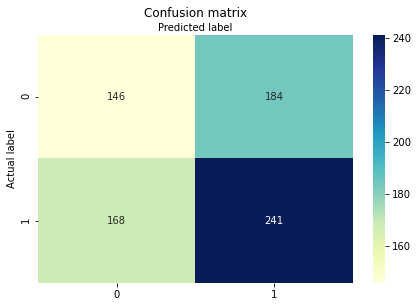

In [8]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap for data set 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.523680649526387
